# INSAID Hiring Exercise

# Import libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [95]:
data=pd.read_csv('/content/Churn.csv')

# Understanding the data

In [96]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
print(f'data has {data.shape[0]} rows, {data.shape[1]} columns')

data has 7043 rows, 21 columns


* CustomerID is not useful so we can remove the column

In [98]:
data = data.drop(columns=['customerID'])

In [99]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


* Let's check for the data type of our data 

In [100]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* As we see most of the data is in object format, so need to convert the data to numerical for our model building.

* Let's get some more insights from the data 

In [101]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* We can see that our data has separate Seniorcitizen column along with gender column.
* our numerical data doesn't have missing values.
* Monthlycharges is in float format, so Totalcharges should also be converted in numeric format

# Data manipulation

In [102]:
#Let's make a copy of our data so we don't maess our original data
df = data.copy()

In [103]:
#Monthly charges are in numeric format, Total Charges should be numeric amount. Let's convert it to numerical data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in toltal charges


In [104]:
df.loc[df['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since there are less number of values missing, our dataset is not much affected. We can drop those values.

In [105]:
df.dropna(inplace = True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that tenure values can be converted into bins of 1 -12 , 13 - 24 and so on, the max tenure value is 72.

In [106]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [107]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [108]:
#drop column tenure
df.drop(columns= ['tenure'], axis=1, inplace=True)

* Convert the churn values into 0, 1

In [109]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

# Covert categorical variables into  dummy variables

In [110]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


# Data visualization

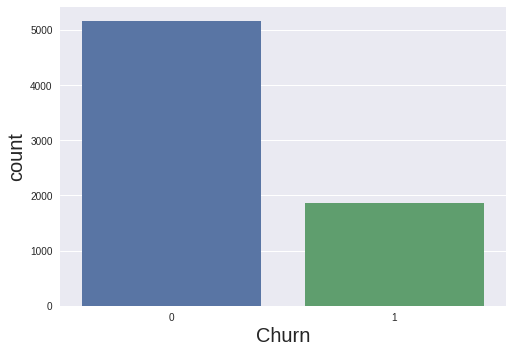

In [111]:
# Let's see the churn count No = 0, Yes = 1

sns.countplot(data=df, x=df.Churn)

In [112]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [113]:
100*df.Churn.value_counts()/len(df.Churn)

0    73.421502
1    26.578498
Name: Churn, dtype: float64

* We can see the data is imbalaced

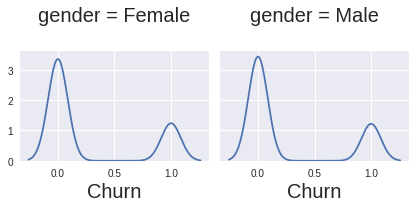

In [114]:
#Let's see gender wise churn

g = sns.FacetGrid(df,col='gender')
g = g.map(sns.kdeplot, 'Churn')

* The churn ratio is similar for gender

* Relationship between Monthly Charges and Total Charges

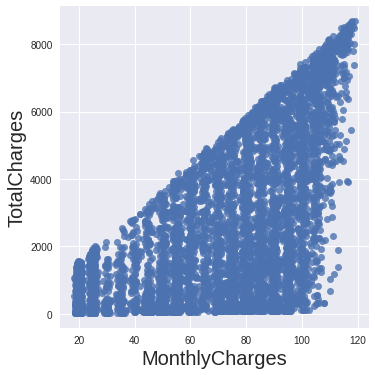

In [115]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

* Total Charges increase as Monthly Charges increase

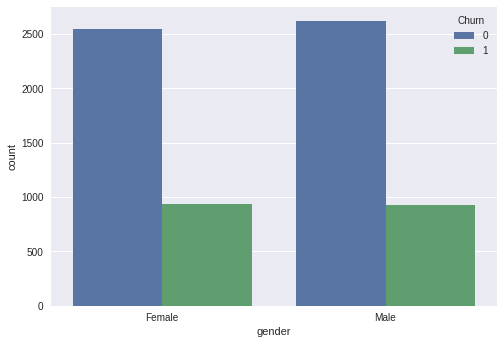

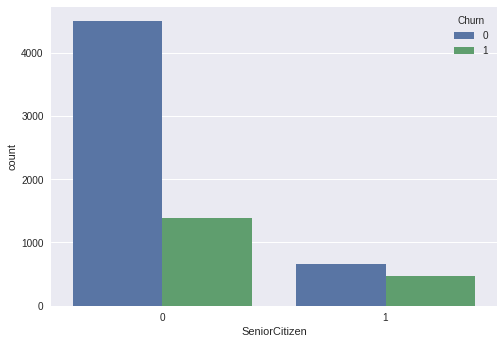

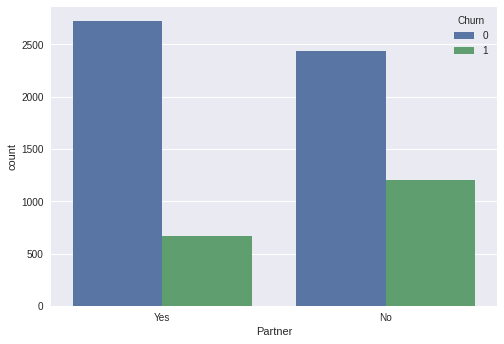

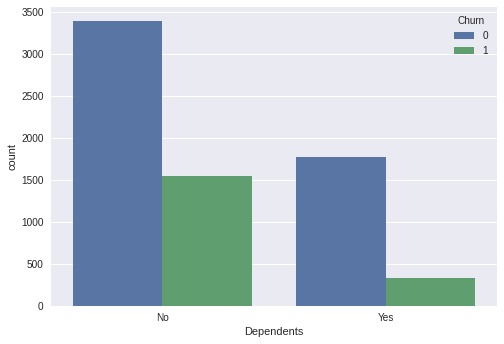

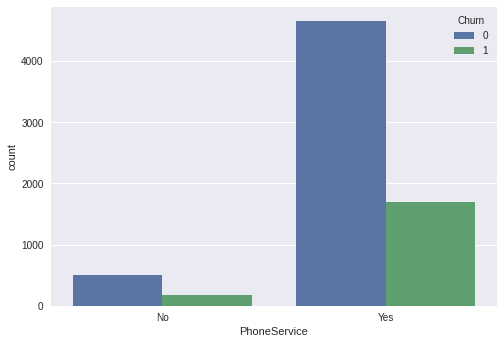

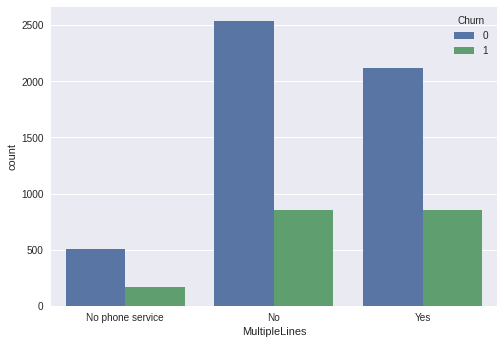

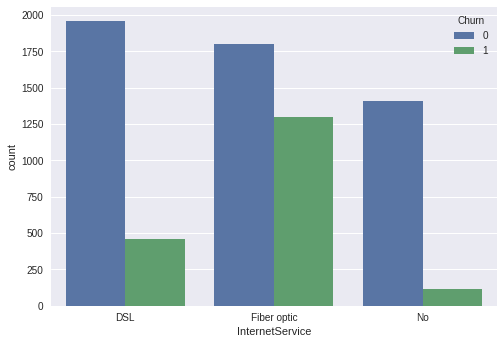

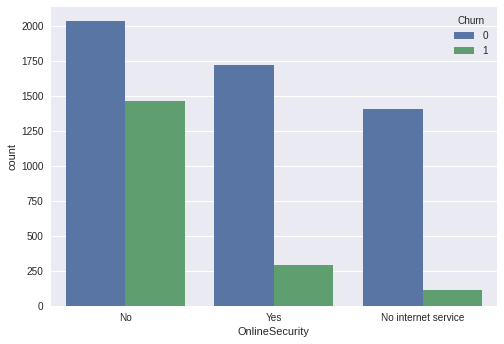

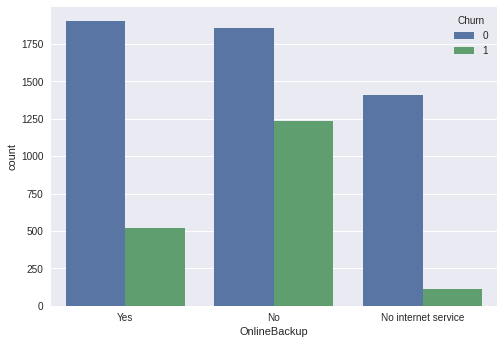

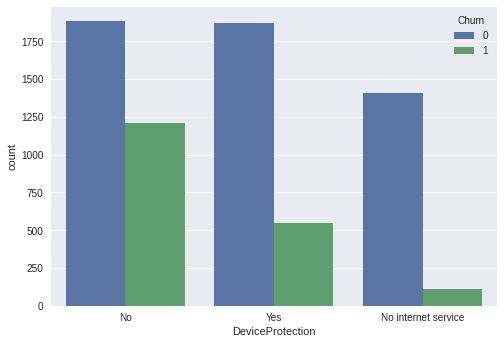

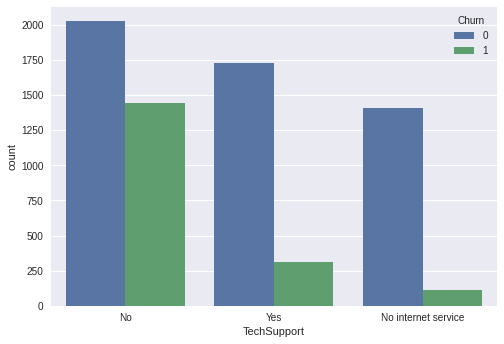

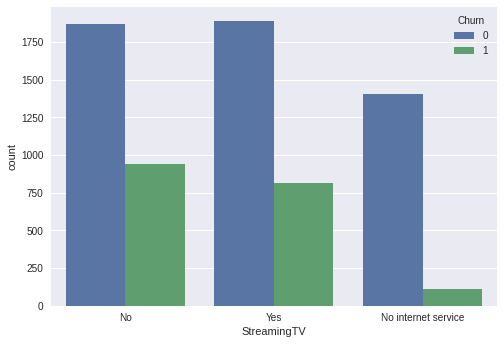

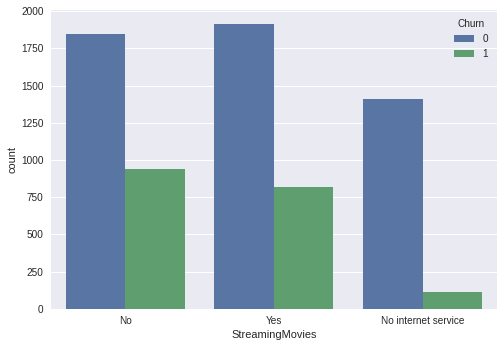

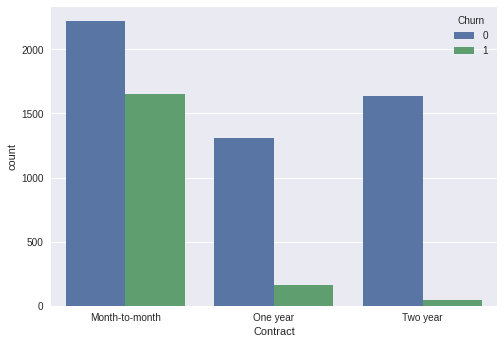

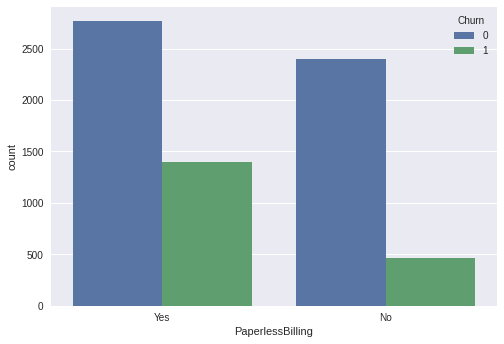

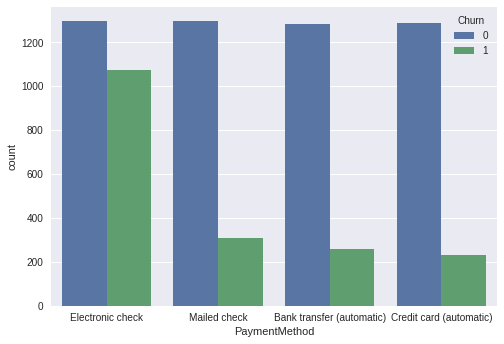

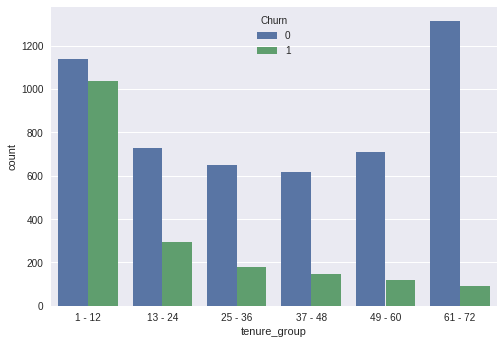

In [116]:
#Plot distibution of individual predictors by churn
plt.style.use('seaborn')
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')
    

 As we can see,
 * Gender does not have much affect on churn
 * Seniorcitizens are less likely to Churn
 * People having partners are more likely to churn, indicating that company needs to come up with new plans for partners
 * Phoneservice also affect the rate of churn
 * Adding features like online security, backups, protection, tech support helps to maintain the customers
 * People with month to month plans are likely to churn more than the people with contract basis of one or more years
 * People with a tenure of 1 - 24 months are more likely to churn


# Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

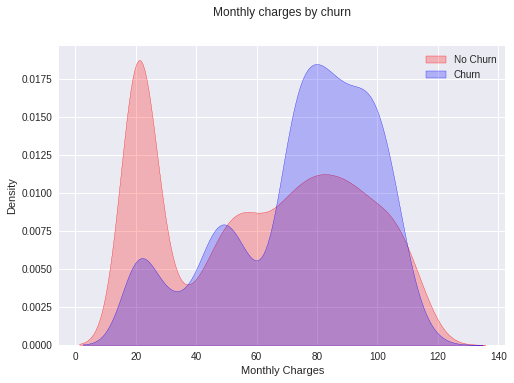

In [117]:
month = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ], color="Red", shade = True)
month = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ], ax =month, color="Blue", shade= True)
month.legend(["No Churn","Churn"],loc='upper right')
month.set_ylabel('Density')
month.set_xlabel('Monthly Charges')
month.set_title('Monthly charges by churn')

* As we can see, Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

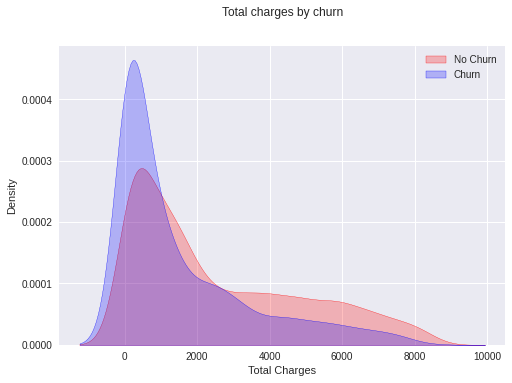

In [118]:
Total = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ], color="Red", shade = True)
Total = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ], ax =Total, color="Blue", shade= True)
Total.legend(["No Churn","Churn"],loc='upper right')
Total.set_ylabel('Density')
Total.set_xlabel('Total Charges')
Total.set_title('Total charges by churn')

* We can see that there is higher Churn at lower Total Charges, might be the service affecting the churn rate 

# Let us see the correlation

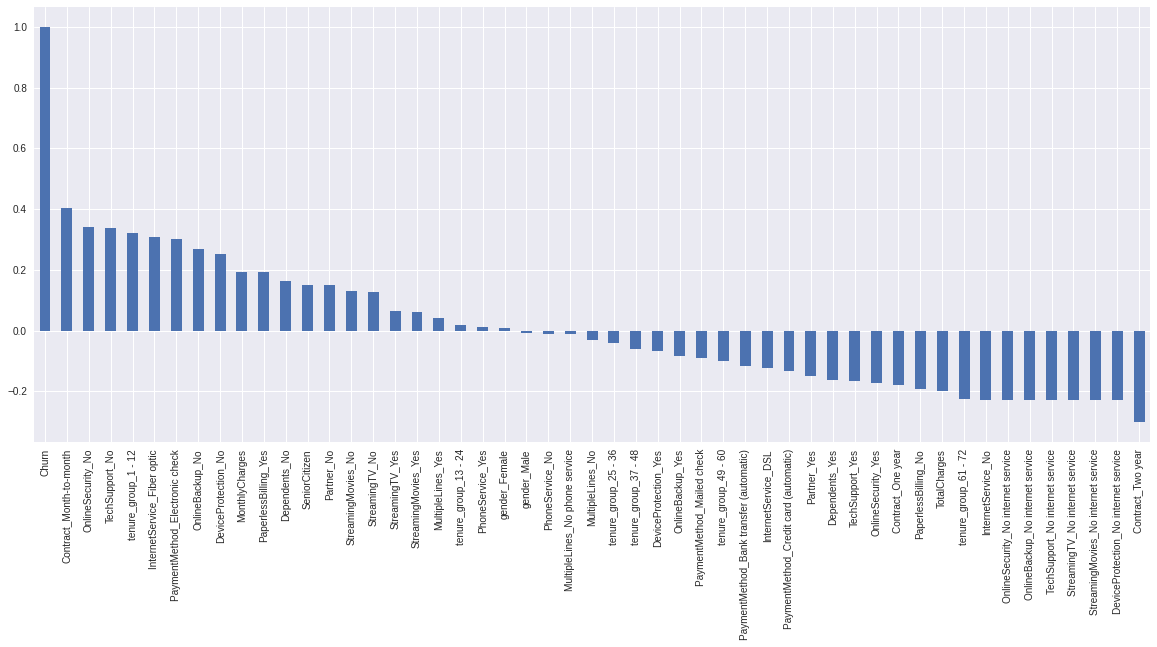

In [119]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

* HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

* LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

* Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

In [120]:
churn0 = df.loc[df["Churn"]==0]
churn1 = df.loc[df["Churn"]==1]

In [121]:
def uniplot(df,col,title,hue =None):
    
    plt.style.use('seaborn')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

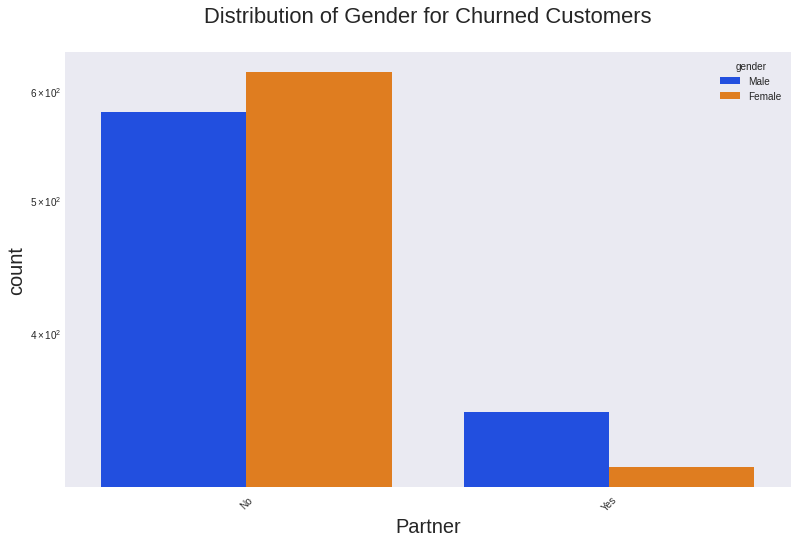

In [122]:
uniplot(churn1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

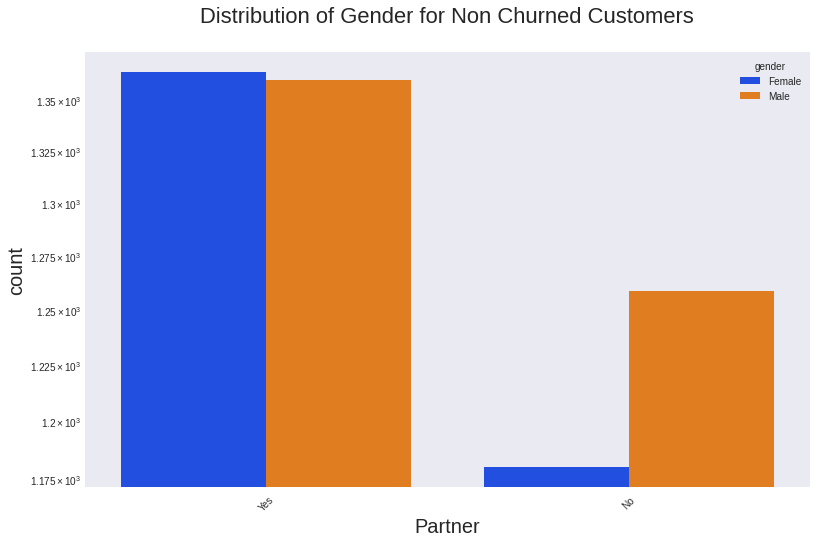

In [123]:
uniplot(churn0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

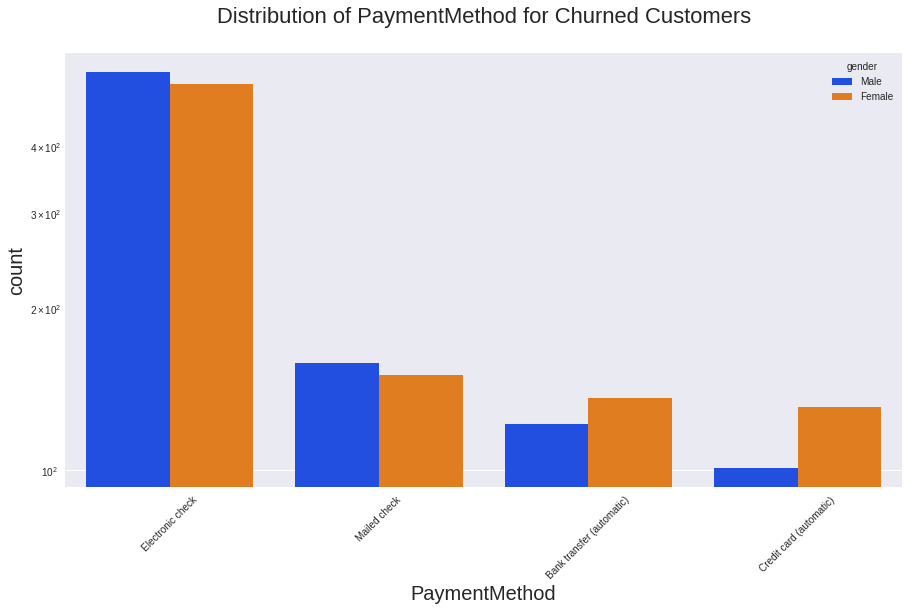

In [124]:
uniplot(churn1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

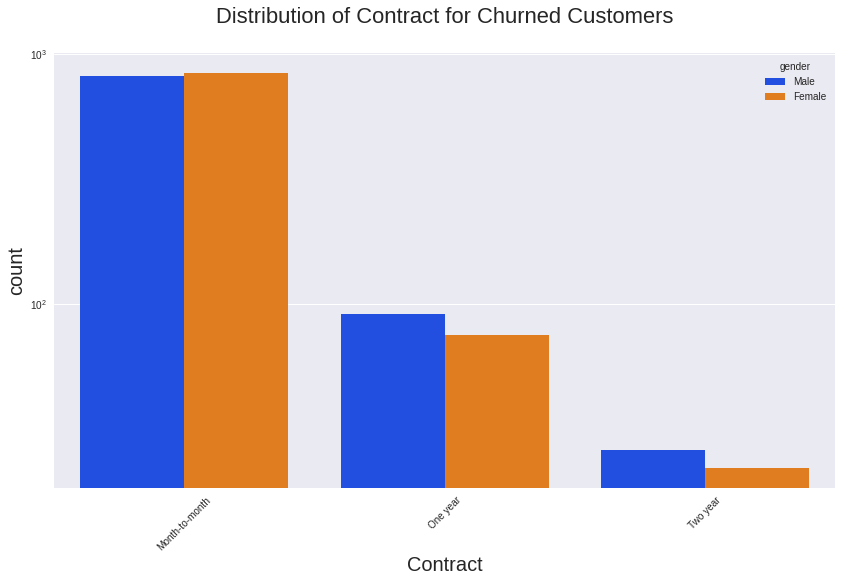

In [125]:
uniplot(churn1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

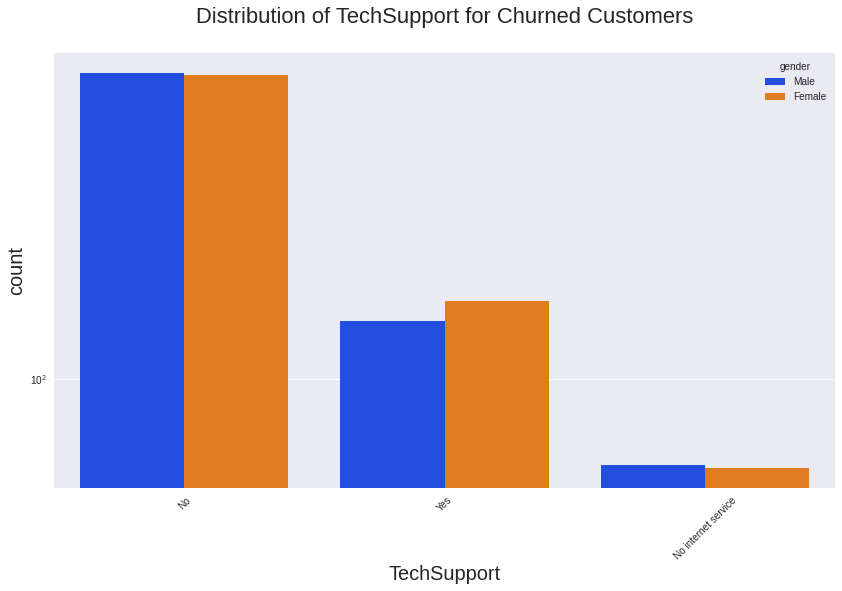

In [126]:
uniplot(churn1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

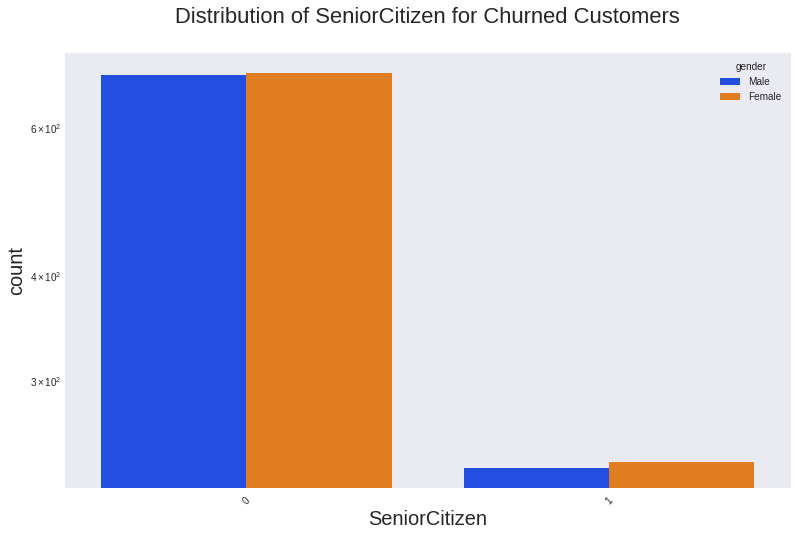

In [127]:
uniplot(churn1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

* Electronic check medium are the highest churners
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* No Online security, No Tech Support category are high churners
* Non senior Citizens are high churners

In [128]:
df_dummies.to_csv('tel_churn.csv')

# Implement Machine Learning Model


In [129]:
#Import libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

In [130]:
# Load the data
df = pd.read_csv("tel_churn.csv")
df = df.drop('Unnamed: 0',axis = 1)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


* Separate the independent and dependent columns

In [131]:
x = df.drop('Churn',axis = 1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [132]:
y = df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

* Train Test Split

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

* Build a model

In [135]:
model_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100,max_depth = 6, min_samples_leaf = 8)

* Fit the model

In [136]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

* Predict x_test data

In [137]:
y_pred = model_rf.predict(x_test)

* Check the score

In [138]:
model_rf.score(x_test,y_test)

0.7910447761194029

In [139]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1008
           1       0.70      0.47      0.56       399

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



* As we can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
* Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
* Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [140]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

* Split the data

In [141]:
xr_train1,xr_test1,yr_train1,yr_test1 = train_test_split(X_resampled1, y_resampled1, test_size = 0.2)

* Build a model

In [142]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=5)

* Fit the model and evaluate

In [143]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [144]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [145]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [146]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9379251700680272
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       546
           1       0.93      0.95      0.94       630

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



In [147]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[502  44]
 [ 29 601]]


* Now we can see quite better results, i.e. Accuracy: 94 %, and a very good recall, precision & f1 score for minority class.

# Pickling the model

In [148]:
import pickle

In [149]:
filename = 'Churn_Model.sav'

In [150]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [151]:
load_model = pickle.load(open(filename, 'rb'))

In [152]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [153]:
model_score_r1

0.9379251700680272

# Final Conclusion

After analysing the data, we could come up with some strategies: 
* Company could target areas and plan for new packages with good features
* Company could make package plans for partners/couples
* Company should collect feedback on the sevices they provide on weekly/monthly basis, and try to identify the issues by categorising the data 